# Convolutional Neural Network for Sign Language MNIST
## About this dataset

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).




## Importing dependencies

In [2]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

2024-11-21 14:33:22.839274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-21 14:33:23.028253: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-21 14:33:23.080927: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 14:33:23.416749: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 14:33:25.515160: W tensorflow/compiler/tf2

## Specifying the training data and testing data paths

In [3]:
TRAIN_PATH = 'data/sign_mnist_train.csv'
VALID_PATH = 'data/sign_mnist_test.csv'
NO_CLASSES = 26

## Reading the data

In [4]:
trainData = pd.read_csv(TRAIN_PATH)
validData = pd.read_csv(VALID_PATH)

## Transforming the data so that it can be fed into the CNN

In [5]:
x_train = np.array(trainData.drop(columns=['label']))
y_train = np.array(trainData['label'])
x_valid = np.array(validData.drop(columns=['label']))
y_valid = np.array(validData['label'])

## Scaling the data for computational efficiency

In [6]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_train = x_train/255.0
x_valid = x_valid.reshape(len(x_valid),28,28,1)
x_valid = x_valid/255.0

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((27455, 28, 28, 1), (27455,), (7172, 28, 28, 1), (7172,))

## Defining Model Architecture

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(15, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

/home/liantsoa/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the model and training it

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=7, validation_data=(x_valid,y_valid))
model.save('sign_language_mnist_cnn.h5')

Epoch 1/7


2024-11-21 14:33:34.054549: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 86098880 exceeds 10% of free system memory.


858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.3946 - loss: 2.0117 - val_accuracy: 0.7646 - val_loss: 0.6229
Epoch 2/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9119 - loss: 0.2705 - val_accuracy: 0.8694 - val_loss: 0.4338
Epoch 3/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9696 - loss: 0.0963 - val_accuracy: 0.8984 - val_loss: 0.3631
Epoch 4/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9809 - loss: 0.0583 - val_accuracy: 0.9225 - val_loss: 0.3253
Epoch 5/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9874 - loss: 0.0381 - val_accuracy: 0.9235 - val_loss: 0.3195
Epoch 6/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9870 - loss: 0.0402 - val_accuracy: 0.8903 - val_loss: 0.4625
Epoch 7/7
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9299 - val_loss: 0.2986


### The training accuracy of this model is : ```0.9954```
### The validation accuracy of this model is : ```~92```




## Testing on some data


In [9]:
testImage = x_valid[0] #We will take an image from the training dataset
testImage2 = x_valid[2]
prediction = model.predict(testImage.reshape(-1,28,28,1)) #Model takes input as 4 dimensions, so we reshape it.
prediction2= model.predict(testImage2.reshape(-1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [10]:
testImage

array([[[0.58431373],
        [0.58431373],
        [0.58823529],
        [0.58823529],
        [0.58823529],
        [0.59215686],
        [0.59215686],
        [0.58823529],
        [0.59215686],
        [0.59607843],
        [0.59607843],
        [0.59607843],
        [0.59607843],
        [0.59607843],
        [0.6       ],
        [0.6       ],
        [0.59215686],
        [0.59607843],
        [0.59607843],
        [0.6       ],
        [0.59607843],
        [0.59607843],
        [0.59215686],
        [0.59215686],
        [0.58823529],
        [0.58823529],
        [0.58823529],
        [0.58431373]],

       [[0.58823529],
        [0.58823529],
        [0.58823529],
        [0.59607843],
        [0.59607843],
        [0.59215686],
        [0.59607843],
        [0.59607843],
        [0.59607843],
        [0.59607843],
        [0.59607843],
        [0.6       ],
        [0.60392157],
        [0.6       ],
        [0.60392157],
        [0.60392157],
        [0.6       ],
        

## Display the result

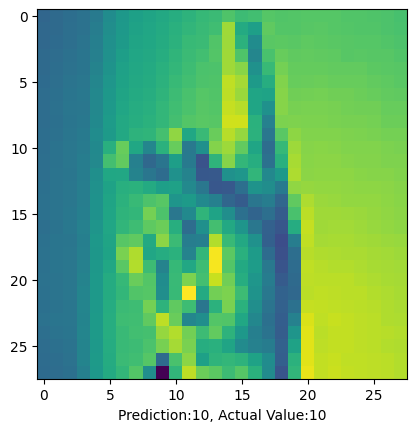

In [11]:
plt.imshow(testImage2.reshape(28, 28)) #plt.imshow() requires a 2D array, so we reshape the input

plt.xlabel(f"Prediction:{np.argmax(prediction2)}, Actual Value:{y_valid[2]}")
plt.show()

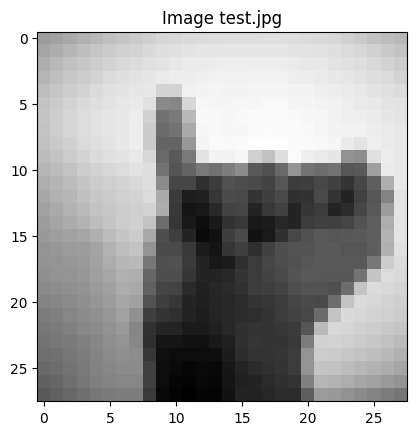

In [12]:
from PIL import Image
import numpy as np

# Lire l'image test.jpg
image_path = 'test.jpg'
image = Image.open(image_path).convert('L')  # Convertir l'image en niveaux de gris
image = image.resize((28, 28))  # Redimensionner l'image à 28x28 pixels
image_array = np.array(image).reshape(-1, 28, 28, 1)  # Reshaper l'image pour correspondre à l'entrée du modèle

# Afficher l'image pour vérification
plt.imshow(image_array.reshape(28, 28), cmap='gray')
plt.title('Image test.jpg')
plt.show()


In [13]:
predictiontest=model.predict(image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


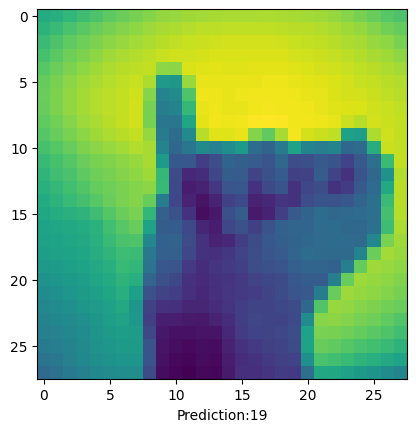

In [16]:
plt.imshow(image_array.reshape(28, 28))#plt.imshow() requires a 2D array, so we reshape the input

plt.xlabel(f"Prediction:{np.argmax(predictiontest)}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


19